# Ada Boost Regressor Project 2.0


In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd

#For DataVisualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [5]:
#Lets import Dataset 
data=pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1. id :- It is the unique numeric number assigned to each house being sold.



2. date :- It is the date on which the house was sold out.



3. price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.



4. bedrooms :- It determines number of bedrooms in a house.



5. bathrooms :- It determines number of bathrooms in a bedroom of a house.



6. sqft_living :- It is the measurement variable which determines the measurement of house in square foot.



7. sqft_lot : It is also the measurement variable which determines square foot of the lot.



8. floors: It determines total floors means levels of house.




9. waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 
means yes.






10. view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.



11. condition : It determines the overall condition of a house on a scale of 1 to 5.



12. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11.



13. sqft_above : It determines square footage of house apart from basement.



14. sqft_basement : It determines square footage of the basement of the house.




15. yr_built : It detrmines the date of building of the house.



16. yr_renovated : It detrmines year of renovation of house.




17. zipcode : It determines the zipcode of the location of the house.




18. lat : It determines the latitude of the location of the house.




19. long : It determines the longitude of the location of the house.



20. sqft_living15 : Living room area in 2015(implies-- some renovations)



21. sqft_lot15 : lotSize area in 2015(implies-- some renovations)

In [6]:
#Lets check Data Summary

In [7]:
data.shape

(21613, 21)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [8]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#Okay , There is no null values in our data . So we are good to proceed .and check stats. 

In [10]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [28]:
#Lets plot in graph and see how distributed in our data ..using distribution plot.
#Before that lets delete the uncessary features like Id

#Okay we consider one thing . float data is 99% continious data

In [30]:
data.shape

(21613, 19)

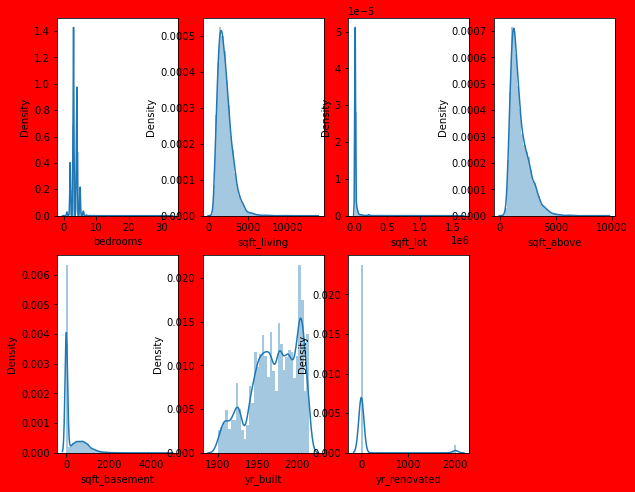

In [31]:
plt.figure(figsize=(10,8),facecolor='red')
plotnumber =1
for column in data[['bedrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated']]:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

In [34]:
#I think my model is overfitted . lets plot one time in box plot.

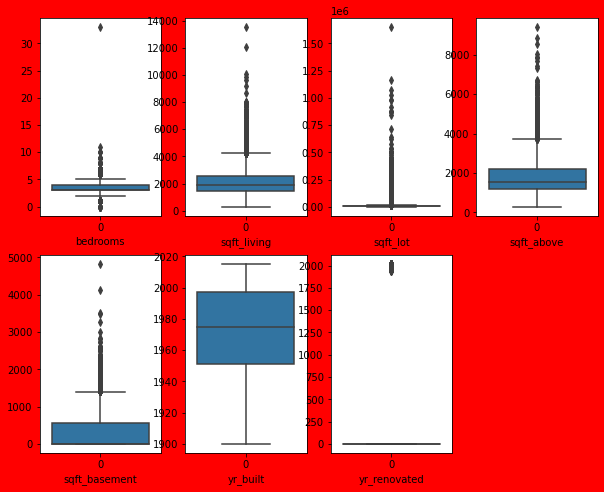

In [35]:
plt.figure(figsize=(10,8),facecolor='red')
plotnumber =1
for column in data[['bedrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated']]:
    if plotnumber <=8:
        plt.subplot(2,4,plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

In [36]:
#Okay so we have lot of outliers .
#Lets fix this with the using of z score

In [38]:
data.shape

(21613, 19)

In [37]:
from scipy.stats import zscore

In [39]:
z_score=zscore(data[['bedrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated']])
abs_score=np.abs(z_score)
filtering_entry=(abs_score <3).all(axis=1)
data=data[filtering_entry]
data.shape

(19869, 19)

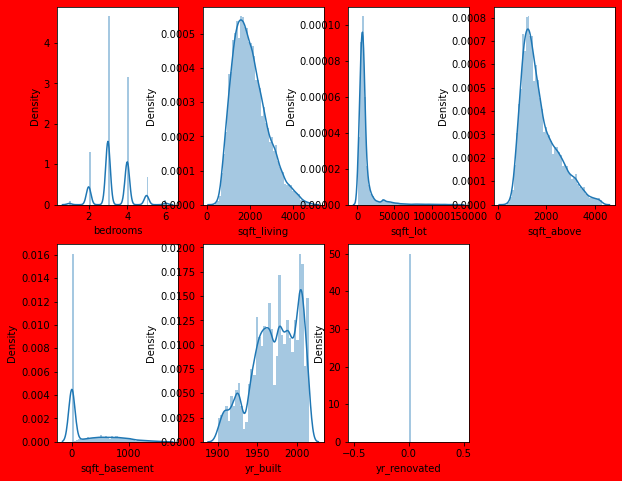

In [40]:
#So again i am going to plot . the same dataset in distribution plot.
plt.figure(figsize=(10,8),facecolor='red')
plotnumber =1
for column in data[['bedrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated']]:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

In [41]:
#Now our data is looking good . we are good to proceed with feature selectio.

In [43]:
#Lets use heatmap.
df=data.corr().abs()

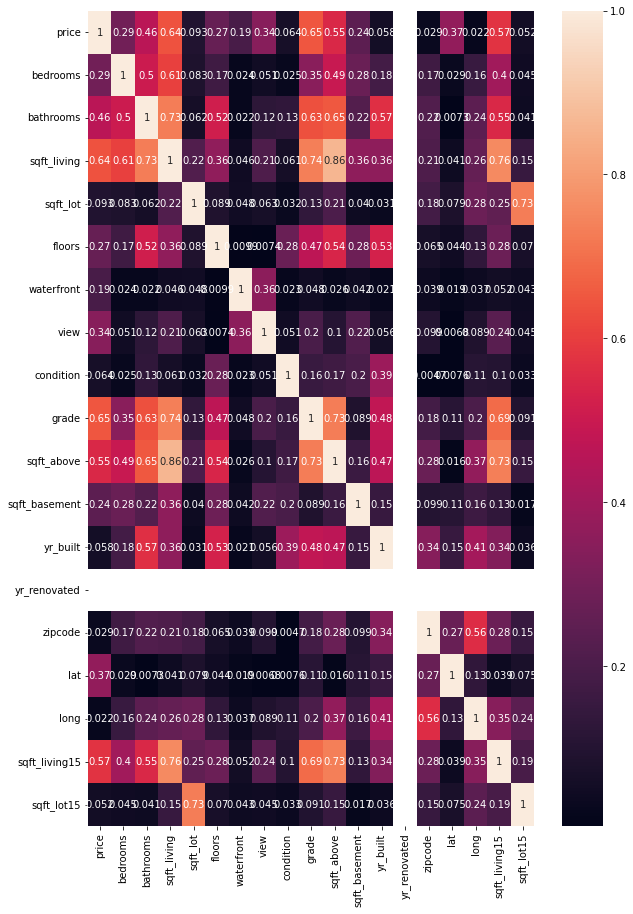

In [45]:
plt.figure(figsize=(10,15))
sns.heatmap(df,annot=True)
plt.show()

In [48]:
#Lets check in VIF .Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [49]:
x=data.drop(columns=['price'])
y=data.price

In [50]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [51]:
x_scaled

array([[-0.3878781 , -1.49011038, -1.04174094, ..., -0.29700375,
        -0.95019998, -0.29301492],
       [-1.55239155, -1.49011038, -1.56882602, ..., -0.12394983,
         1.21030472, -0.13768871],
       [ 0.77663535,  1.30877913, -0.03899372, ..., -1.27764263,
        -0.91888831, -0.33487315],
       ...,
       [-1.55239155, -1.83997157, -1.24743268, ..., -0.59984811,
        -1.45118657, -0.52761417],
       [-0.3878781 ,  0.60905675, -0.50180013, ...,  1.05858529,
        -0.84060916, -0.57398021],
       [-1.55239155, -1.83997157, -1.24743268, ..., -0.59984811,
        -1.45118657, -0.5694724 ]])

In [53]:
#Lets check multicollineary problem
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.727633,bedrooms
1,3.191206,bathrooms
2,inf,sqft_living
3,2.300546,sqft_lot
4,2.140921,floors
5,1.151719,waterfront
6,1.321797,view
7,1.259692,condition
8,3.106038,grade
9,inf,sqft_above


In [54]:
#it might be there is not multicollinearity problem. we are good to proceed.


In [60]:
#Lets create a Train Test Split
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=94255)

In [62]:
#Lets create one fucntion checking accuracy anytimwe want.

In [73]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("===============Training Score=============")
        print("Accuracy Score  ===>  ",r2_score(y_train,y_pred))
    elif train==False:
        pred = cnn.predict(x_test)
        print("================Testing Score==============")
        print("Accuracy Score====> ",r2_score(y_test,pred))

In [64]:
#Lets create a model usning AdaBoostRegressor

In [68]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [69]:
cnn=AdaBoostRegressor()

In [70]:
cnn.fit(x_train,y_train)

AdaBoostRegressor()

In [74]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

===============Training Score=============
Accuracy Score  ===>   0.2993743257966581
================Testing Score==============
Accuracy Score====>  0.2616806275386325


In [75]:
#Our model is underfitted lets hyperparameter tuning . change some parameter.

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
best_pram={'learning_rate':[0.2,0.4,0.6,0.8],'n_estimators':[40,51,60,70]}


In [91]:
rd_search=RandomizedSearchCV(estimator=cnn,param_distributions=best_pram)
rd_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(learning_rate=0.2,
                                               n_estimators=40),
                   param_distributions={'learning_rate': [0.2, 0.4, 0.6, 0.8],
                                        'n_estimators': [40, 51, 60, 70]})

In [92]:
rd_search.best_params_

{'n_estimators': 60, 'learning_rate': 0.2}

In [93]:
cnn=rd_search.best_estimator_

In [94]:
cnn.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.2, n_estimators=60)

In [95]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

===============Training Score=============
Accuracy Score  ===>   0.6725283593170436
================Testing Score==============
Accuracy Score====>  0.6469596986561743


In [ ]:
#Student of DataScience 
#Student of DataTrained-Saurav
#Date - 22-09-2022
#Time - 13:17